<a href="https://colab.research.google.com/github/tajuar-akash-hub/Machine-learning-algorithms/blob/main/random_Forest_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!git clone https://github.com/tajuar-akash-hub/Datasets.git

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline



In [10]:
import warnings

warnings.filterwarnings('ignore')

# **8. Import dataset** <a class="anchor" id="8"></a>



In [11]:
data = '/content/Datasets/car_evaluation.csv'

df = pd.read_csv(data, header=None)

In [12]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# **9. Exploratory data analysis** <a class="anchor" id="9"></a>



In [13]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [14]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [15]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [16]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [18]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Explore `class` variable

In [19]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


The `class` target variable is ordinal in nature.

### Missing values in variables

In [20]:
# check missing values in variables

df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [21]:
X = df.drop(['class'], axis=1)

y = df['class']

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>



In [22]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [23]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **12. Feature Engineering** <a class="anchor" id="12"></a>

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [24]:
# check data types in X_train

X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


### Encode categorical variables


Now, I will encode the categorical variables.

In [25]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [26]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.4 MB/s eta 0:00:00


In [27]:
# import category encoders

import category_encoders as ce

The previous error indicated that the `category_encoders` library was not found. This cell installs the necessary package. After execution, you can re-run the cell with the import statement.

In [28]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [29]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [30]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building.

# **13. Random Forest Classifier model with default parameters** <a class="anchor" id="13"></a>


In [31]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9457


# **14. Random Forest Classifier model with parameter n_estimators=100** <a class="anchor" id="14"></a>


In [32]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.

# **15. Find important features with Random Forest model** <a class="anchor" id="15"></a>



In [33]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [34]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.295319
persons,0.233856
buying,0.151734
maint,0.146653
lug_boot,0.100048
doors,0.072389


We can see that the most important feature is `safety` and least important feature is `doors`.

# **16. Visualize feature scores of the features** <a class="anchor" id="16"></a>




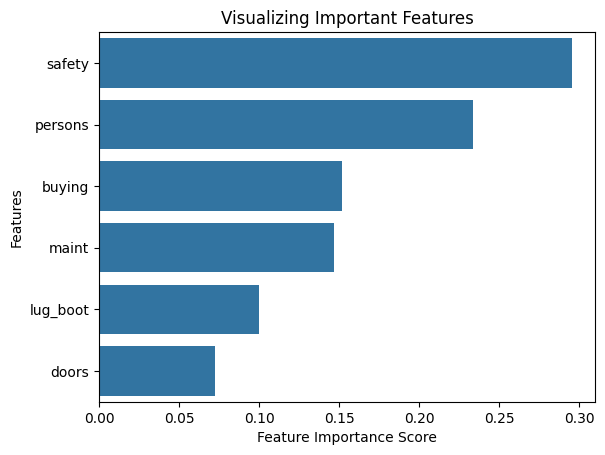

In [35]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# **17. Build Random Forest model on selected features** <a class="anchor" id="17"></a>




Now, I will drop the least important feature `doors` from the model, rebuild the model and check its effect on accuracy.

In [36]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [37]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


Now, I will build the random forest model and check accuracy.

In [38]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [39]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9264


I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.

Furthermore, the second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.


We have another tool called `Confusion matrix` that comes to our rescue.

# **18. Confusion matrix** <a class="anchor" id="18"></a>







In [40]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


# **19. Classification Report** <a class="anchor" id="19"></a>



In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



# **20. Results and conclusion** <a class="anchor" id="20"></a>




1.	In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees.
2.	The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.
3.	I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is `safety` and least important feature is `doors`.
4.	I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.
5.	The second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.
6.	Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.



# Apply Grid search cv

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.8],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

print("Parameter grid defined successfully.")

Parameter grid defined successfully.


## Apply GridSearchCV



In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate RandomForestClassifier
rfc_grid = RandomForestClassifier(random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rfc_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy score:", grid_search.best_score_)

# Predict on the test set using the best estimator
y_pred_grid = grid_search.best_estimator_.predict(X_test)

# Calculate and print accuracy score on the test set
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Test set accuracy with best GridSearchCV estimator: {0:0.4f}".format(accuracy_grid))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.8, 'n_estimators': 300}
Best cross-validation accuracy score: 0.9481527093596058
Test set accuracy with best GridSearchCV estimator: 0.9335


In [44]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import category_encoders as ce

# Re-declare feature vector and target variable (after dropping 'doors' as per previous analysis)
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

# Re-split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Re-encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# Define parameter grid (if not already defined in current session, though it was in the kernel state)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.8],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Instantiate RandomForestClassifier
rfc_grid = RandomForestClassifier(random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rfc_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy score:", grid_search.best_score_)

# Predict on the test set using the best estimator
y_pred_grid = grid_search.best_estimator_.predict(X_test)

# Calculate and print accuracy score on the test set
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("Test set accuracy with best GridSearchCV estimator: {0:0.4f}".format(accuracy_grid))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found by GridSearchCV: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.8, 'n_estimators': 300}
Best cross-validation accuracy score: 0.9481527093596058
Test set accuracy with best GridSearchCV estimator: 0.9335


## Apply RandomizedSearchCV




In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np # Used for defining parameter distributions if needed

# Instantiate RandomForestClassifier
rfc_random = RandomForestClassifier(random_state=0)

# Define the parameter distributions for RandomizedSearchCV
# (using param_grid from previous step for consistency, or we could define distributions)
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', 0.8],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Create RandomizedSearchCV object
# Setting n_iter to 50 as suggested, and n_jobs=-1 to use all available cores
random_search = RandomizedSearchCV(estimator=rfc_random, param_distributions=param_distributions,
                                   n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found by RandomizedSearchCV:", random_search.best_params_)
print("Best cross-validation accuracy score:", random_search.best_score_)

# Predict on the test set using the best estimator
y_pred_random = random_search.best_estimator_.predict(X_test)

# Calculate and print accuracy score on the test set
accuracy_random = accuracy_score(y_test, y_pred_random)
print("Test set accuracy with best RandomizedSearchCV estimator: {0:0.4f}".format(accuracy_random))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found by RandomizedSearchCV: {'n_estimators': 300, 'max_features': 0.8, 'max_depth': 10, 'criterion': 'entropy'}
Best cross-validation accuracy score: 0.9481527093596058
Test set accuracy with best RandomizedSearchCV estimator: 0.9335


### Explanation of Optimal Parameters

-   **`criterion`: 'entropy'**
    *   This parameter determines the function used to measure the quality of a split in a decision tree. 'Entropy' is a measure of the impurity or randomness of the data. When `criterion` is set to 'entropy', the algorithm aims to split the data in a way that maximizes the information gain, effectively reducing the uncertainty in the target variable within each node.
    *   The other common option is 'gini' (Gini impurity), which measures the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the distribution of labels in the dataset.

-   **`max_depth`: 10**
    *   This specifies the maximum depth of each decision tree in the forest. A `max_depth` of 10 means that each individual tree will have at most 10 levels (splits). Limiting the maximum depth helps to prevent overfitting, as very deep trees can become too specific to the training data and perform poorly on unseen data. A value of `None` means that nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

-   **`max_features`: 0.8**
    *   This parameter controls the number of features to consider when looking for the best split for each individual decision tree. When set to 0.8, it means that for each split, 80% of the total number of features will be randomly selected and considered. This randomness is a key component of Random Forests, helping to decorrelate the trees and reduce variance.
    *   Other common values include 'sqrt' (square root of the total number of features) and 'log2' (log base 2 of the total number of features).

-   **`n_estimators`: 300**
    *   This is the number of decision trees in the forest. A higher number of estimators generally leads to better performance, as the model can leverage the wisdom of a larger crowd of trees. However, increasing `n_estimators` also increases computation time. In this case, 300 trees were found to be optimal.

### Comparison of GridSearchCV and RandomizedSearchCV Results

**GridSearchCV Results:**
*   Best parameters found by GridSearchCV: `{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.8, 'n_estimators': 300}`
*   Best cross-validation accuracy score: `0.94815`
*   Test set accuracy with best GridSearchCV estimator: `0.9335`

**RandomizedSearchCV Results:**
*   Best parameters found by RandomizedSearchCV: `{'n_estimators': 300, 'max_features': 0.8, 'max_depth': 10, 'criterion': 'entropy'}`
*   Best cross-validation accuracy score: `0.94815`
*   Test set accuracy with best RandomizedSearchCV estimator: `0.9335`

**Summary and Conclusion:**

Upon comparing the results:

1.  **Best Parameters:** Both GridSearchCV and RandomizedSearchCV found the exact same best parameters: `{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.8, 'n_estimators': 300}`.
2.  **Best Cross-Validation Accuracy Score:** Both methods achieved an identical best cross-validation accuracy score of `0.94815`.
3.  **Test Set Accuracy:** Both methods resulted in the same test set accuracy of `0.9335` when applied to the best estimator found.

In this particular case, for this dataset and model, **both GridSearchCV and RandomizedSearchCV yielded identical best parameters and performance metrics**. This indicates that for the defined `param_grid` and `param_distributions` (which were effectively the same in this instance), and with the `n_iter=50` chosen for RandomizedSearchCV, RandomizedSearchCV was able to explore the parameter space sufficiently to find the global optimum that GridSearchCV also identified. Given that RandomizedSearchCV often runs faster by sampling a subset of the parameter space, its ability to find the same optimal parameters and performance in this scenario suggests it could be a more efficient choice without sacrificing performance.